In [1]:
import sys
import os
sys.path.append('C:\\Users\\luoyan011\\Desktop\\PersonalLearning\\GitHub\\python_functions\\jl_nlp_pkg')
sys.path.append('C:\\Users\\luoyan011\\Desktop\\PersonalLearning\\GitHub\\python_functions\\jl_model_explain_pkg')
import nlpbasic.textClean as textClean
import nlpbasic.docVectors as DocVector
import nlpbasic.dataExploration as DataExploration
import nlpbasic.lda as lda
import nlpbasic.tfidf as tfidf

import model_explain.plot as meplot
import model_explain.shap as meshap

import data_visualization.distribution_plot as dbplot

from numpy import array,asarray,zeros
from scipy.spatial import distance
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense,Flatten,Embedding
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import re
import pycountry
import seaborn as sns
import plotly.express as px

import matplotlib
import matplotlib.dates as mdates
root_path = 'C:\\Users\\luoyan011\\Desktop\\PersonalLearning\\GitHub\\NLP_data'


## Load Data and Data Visualization

In [2]:
raw_data = pd.read_csv(os.path.join(root_path, "fake_job_postings.csv"))
raw_data['jd'] = raw_data[['title','function','employment_type','company_profile','description','requirements','benefits']].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
raw_data.head(3)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0


Columns `telecommuting`, `has_company_logo`, `has_questions`, `employment_type`, `required_experience`, `required_education` and `function` are clean and we will visualize these columns. All other columns are messy or text columns, will be ignored or discussed later.

In [78]:
raw_data['location_country'] = raw_data.location.str[:2]

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


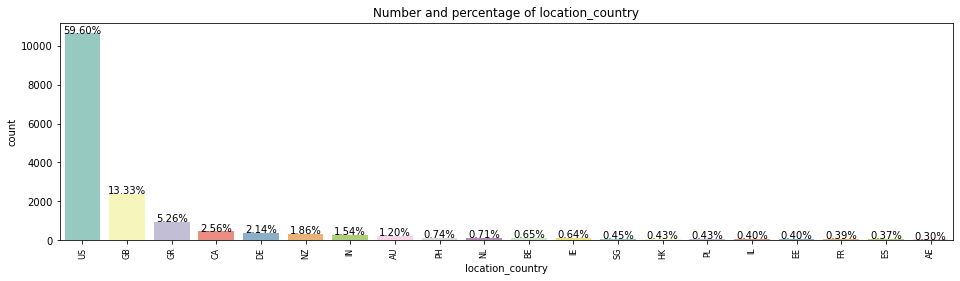

In [79]:
dbplot.plot_count_dist("location_country", "location_country", raw_data, 4, True)

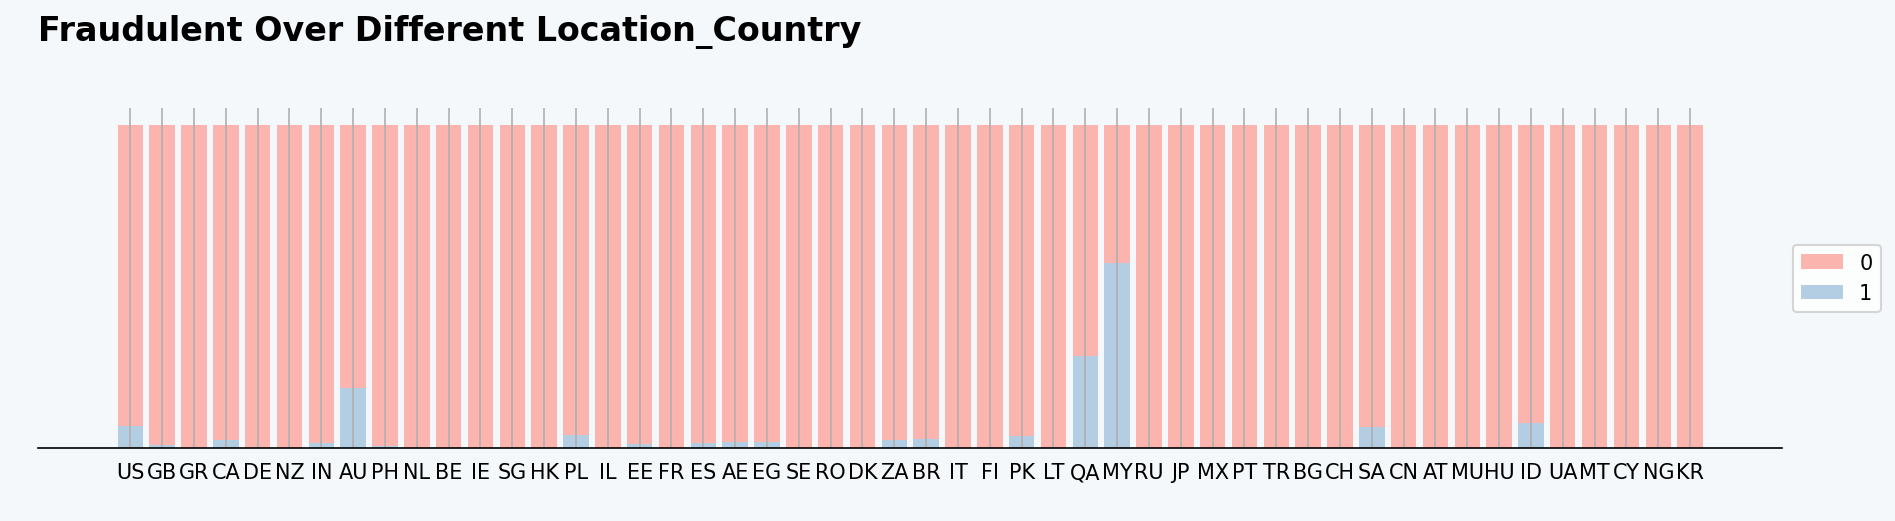

In [89]:
dbplot.generate_bar_proportion(raw_data, 'fraudulent', 'location_country', color = 0, order = True, topn = 50)

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


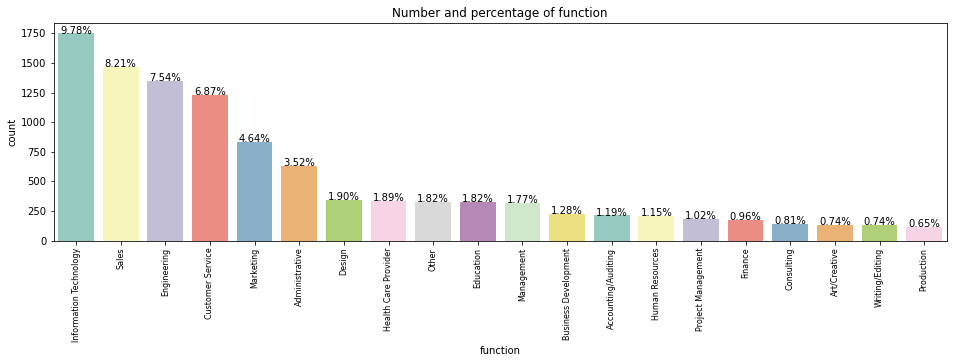

In [17]:
dbplot.plot_count_dist("function", "function", raw_data, 4, True)

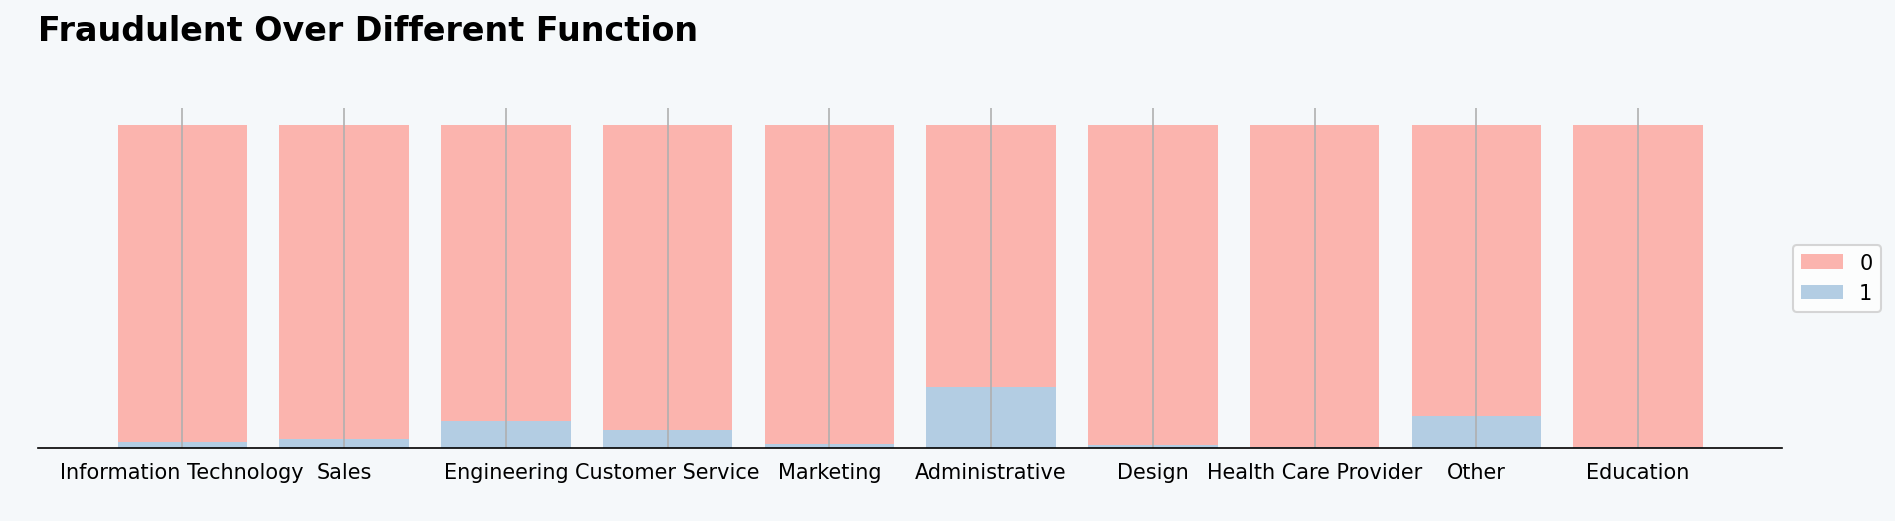

In [43]:
dbplot.generate_bar_proportion(raw_data, 'fraudulent', 'function', color = 0, order = True, topn = 10)

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


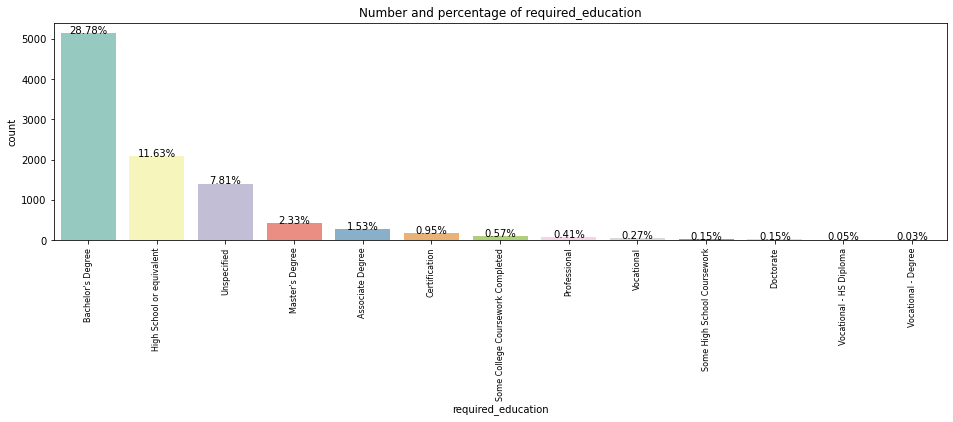

In [28]:
dbplot.plot_count_dist("required_education", "required_education", raw_data, 4, True)

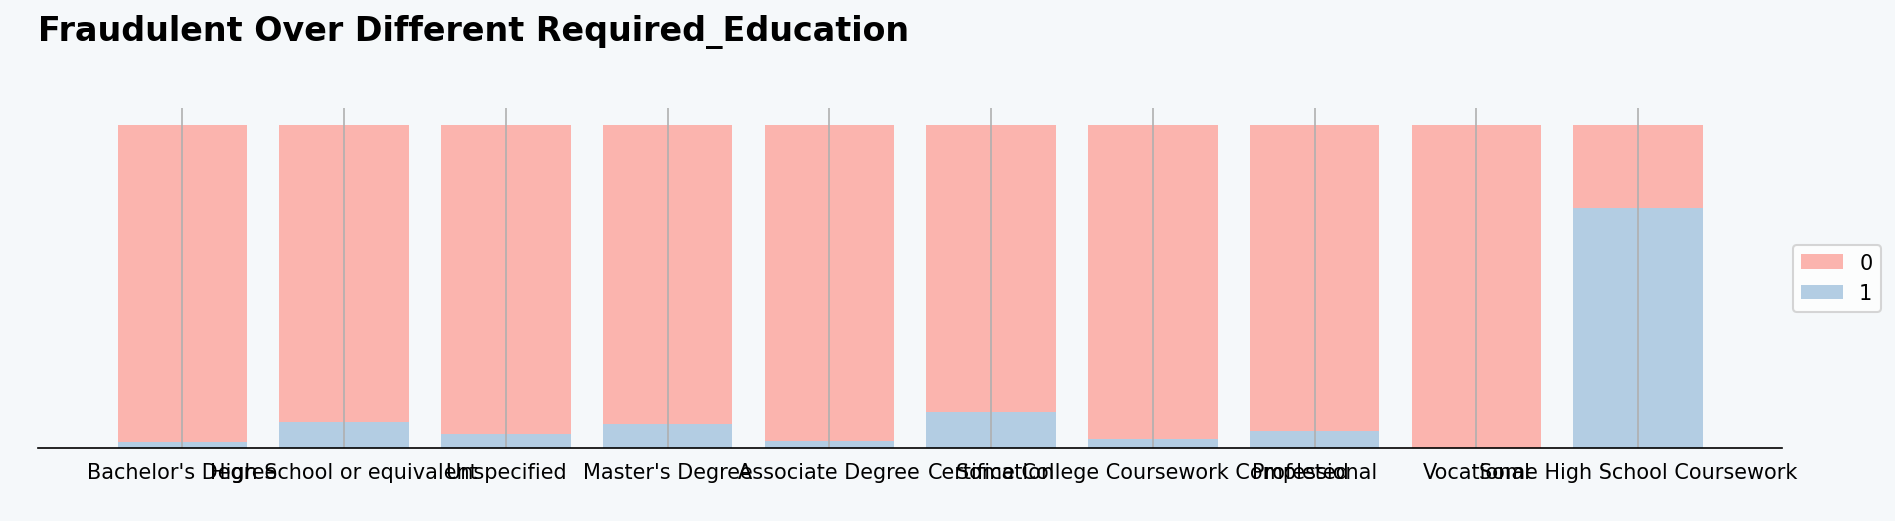

In [45]:
dbplot.generate_bar_proportion(raw_data, 'fraudulent', 'required_education', color = 0, order = True, topn = 10)

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


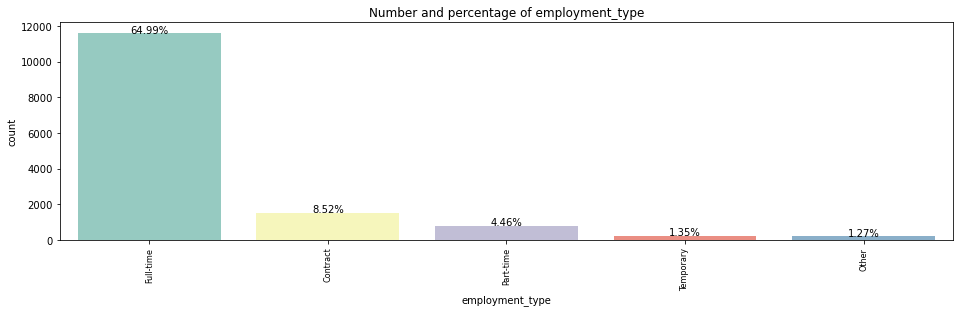

In [46]:
dbplot.plot_count_dist("employment_type", "employment_type", raw_data, 4, True)

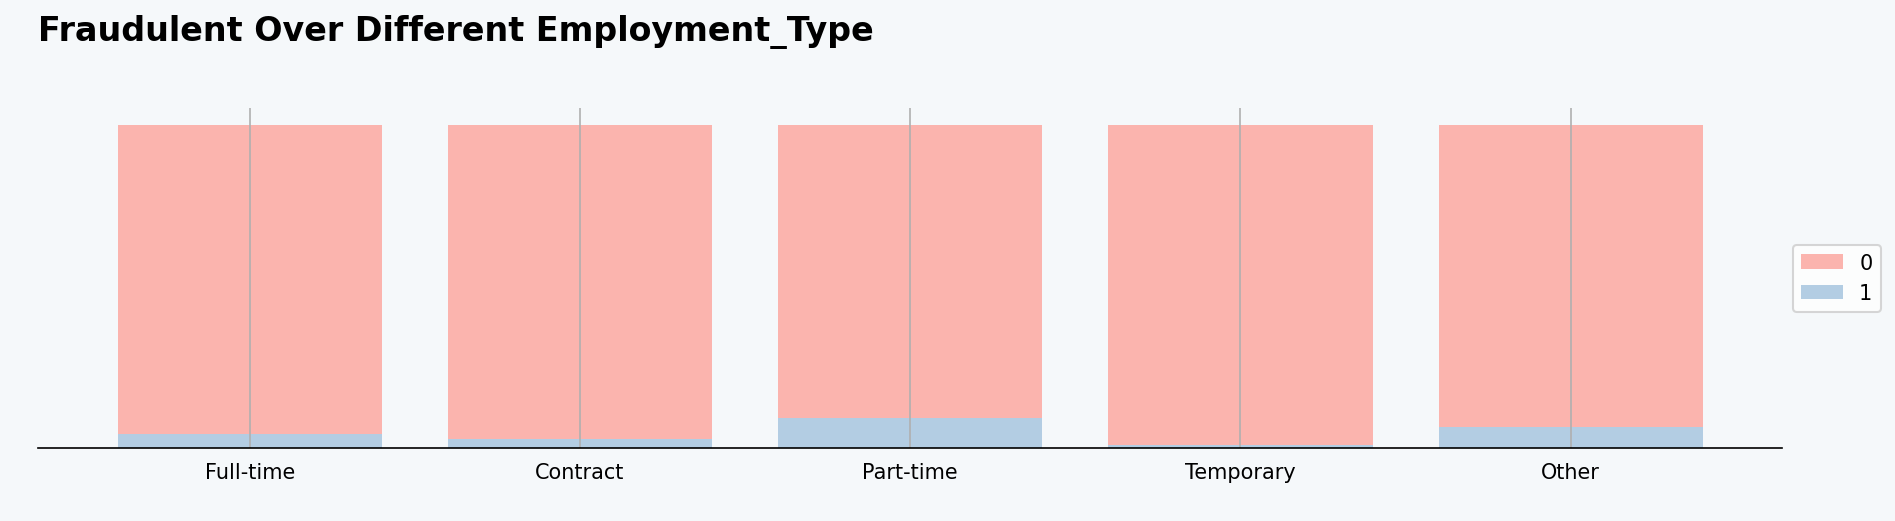

In [47]:
dbplot.generate_bar_proportion(raw_data, 'fraudulent', 'employment_type', color = 0, order = True, topn = 12)

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


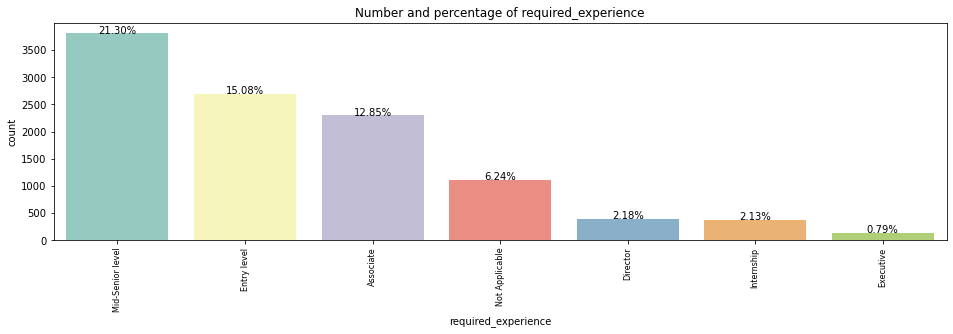

In [48]:
dbplot.plot_count_dist("required_experience", "required_experience", raw_data, 4, True)

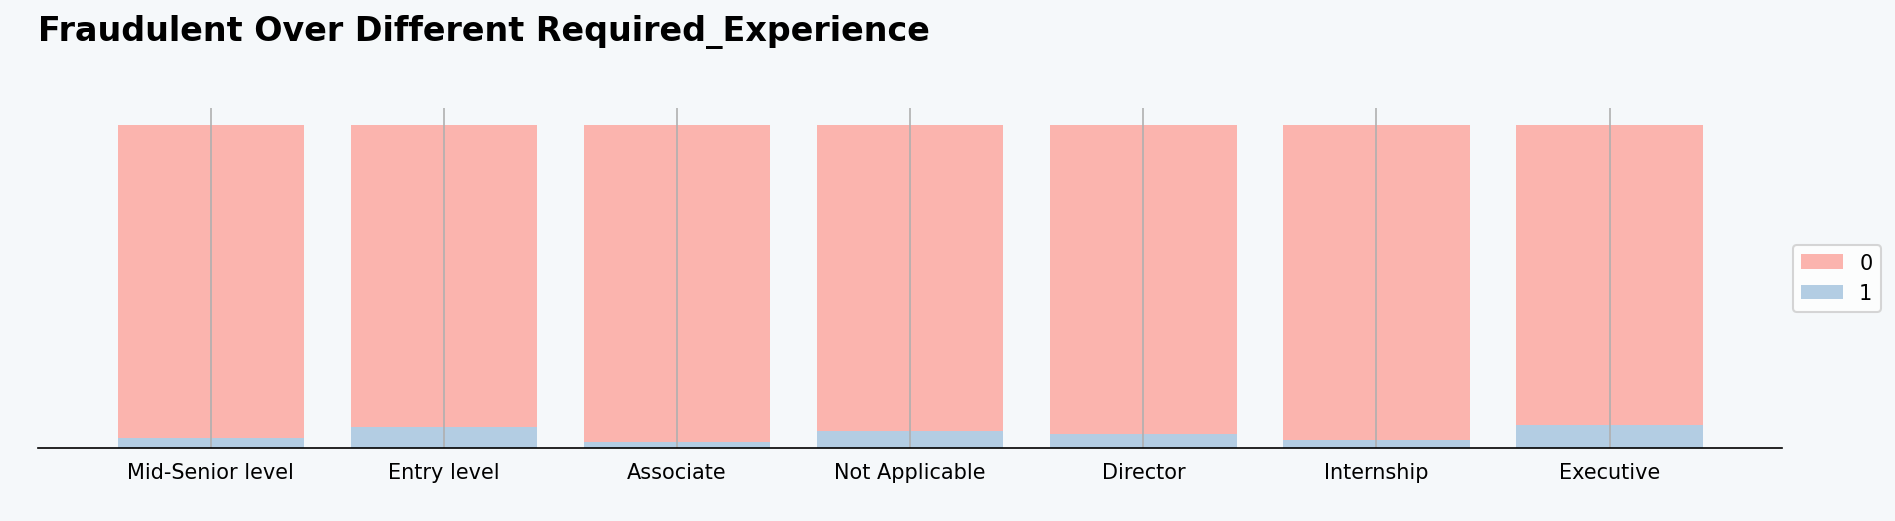

In [58]:
dbplot.generate_bar_proportion(raw_data, 'fraudulent', 'required_experience', color = 0, order = True, topn = 12)

In [63]:
binary_dic = {1:'1', 0:'0'}
raw_data['telecommuting'] = raw_data['telecommuting'].replace(binary_dic)
raw_data['has_company_logo'] = raw_data['has_company_logo'].replace(binary_dic)
raw_data['has_questions'] = raw_data['has_questions'].replace(binary_dic)

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


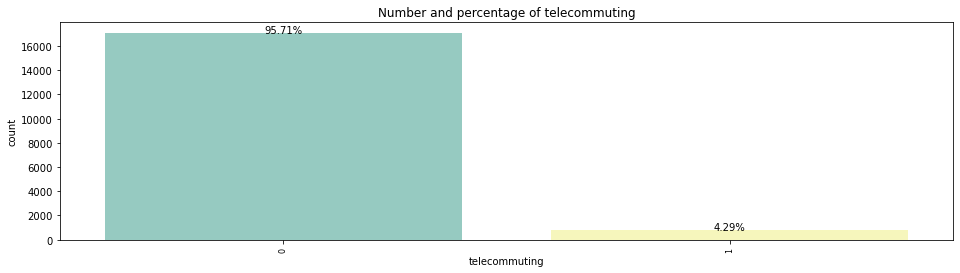

In [64]:
dbplot.plot_count_dist("telecommuting", "telecommuting", raw_data, 4, True)

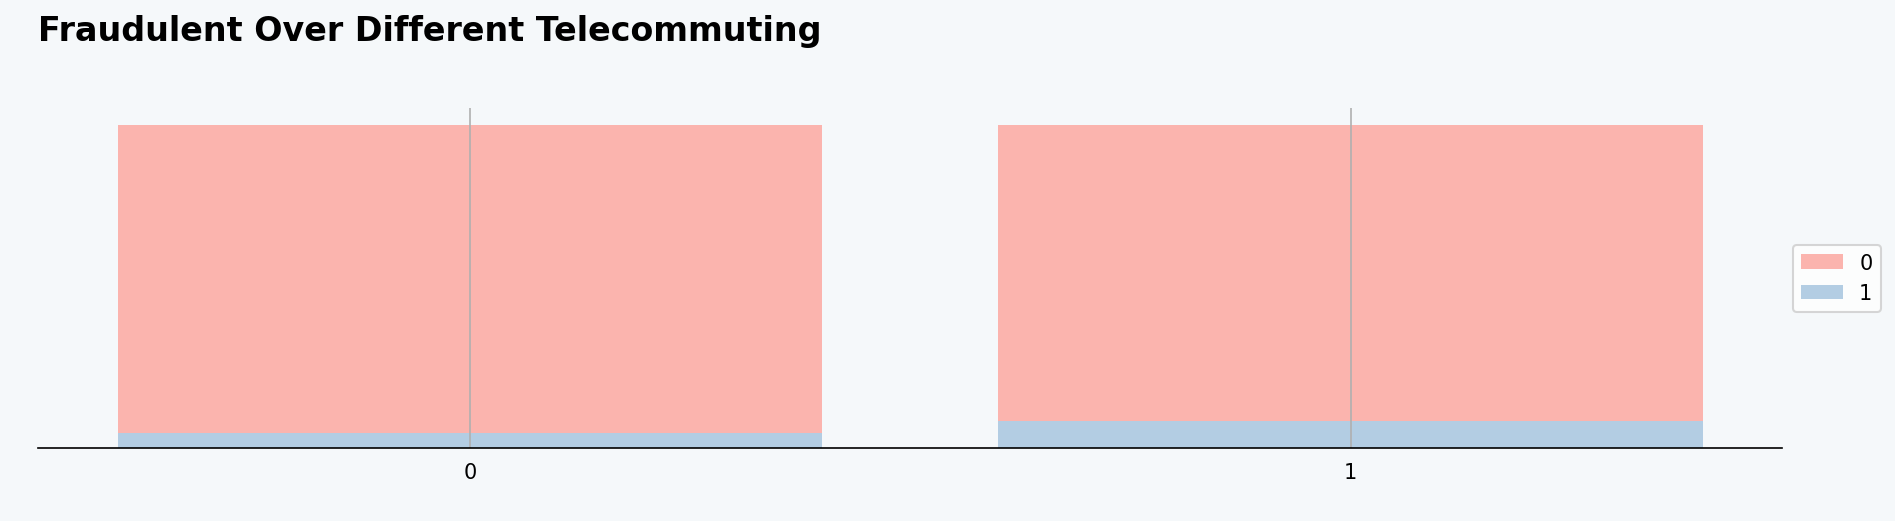

In [65]:
dbplot.generate_bar_proportion(raw_data, 'fraudulent', 'telecommuting', color = 0, order = True, topn = 12)

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


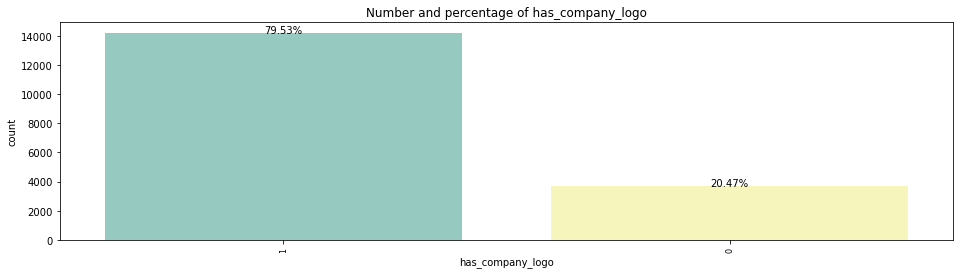

In [66]:
dbplot.plot_count_dist("has_company_logo", "has_company_logo", raw_data, 4, True)

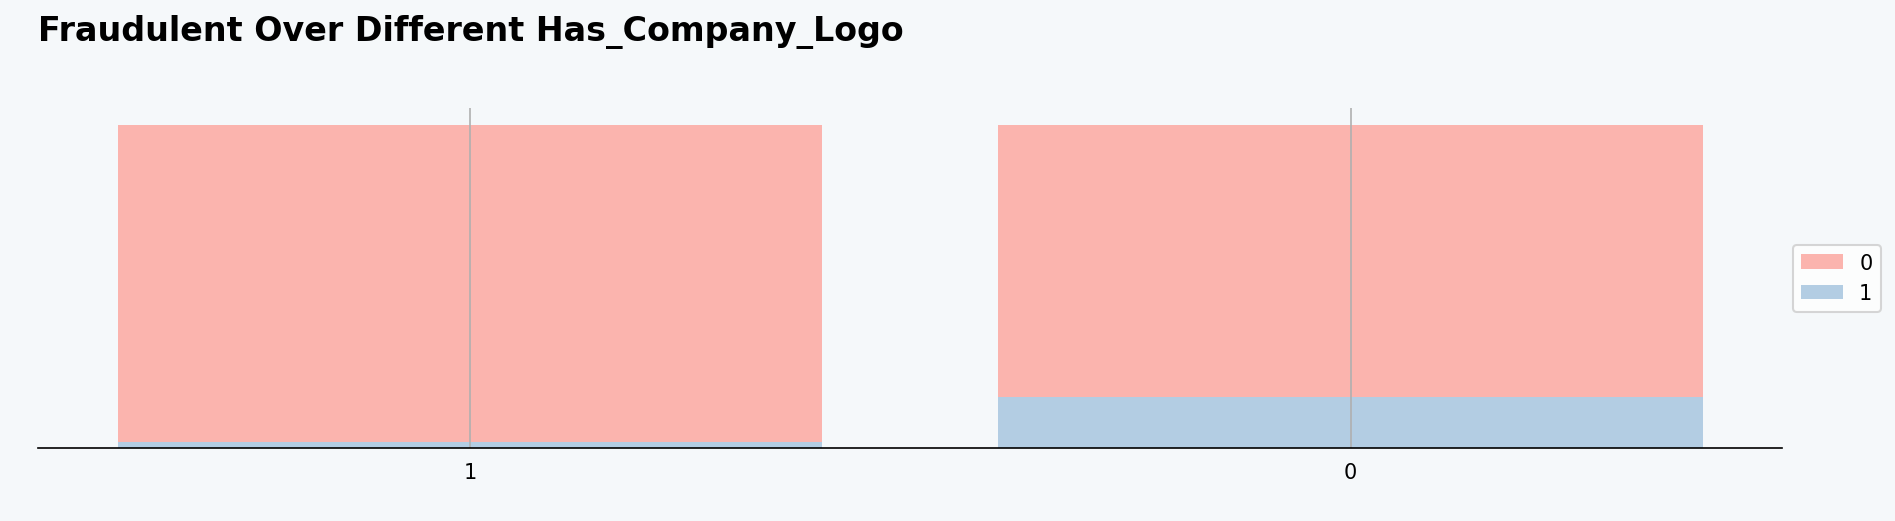

In [67]:
generate_bar_proportion(raw_data, 'fraudulent', 'has_company_logo', color = 0, order = True, topn = 12)

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


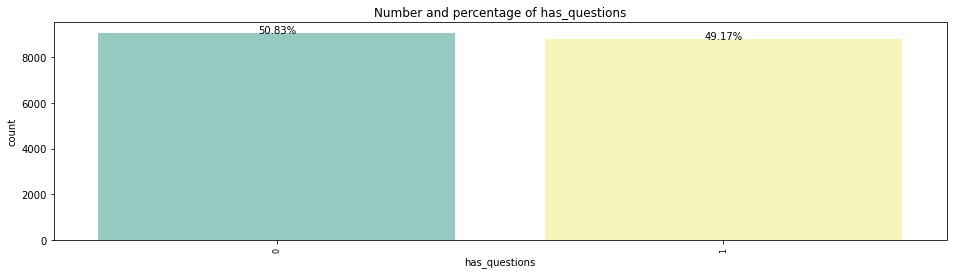

In [68]:
dbplot.plot_count_dist("has_questions", "has_questions", raw_data, 4, True)

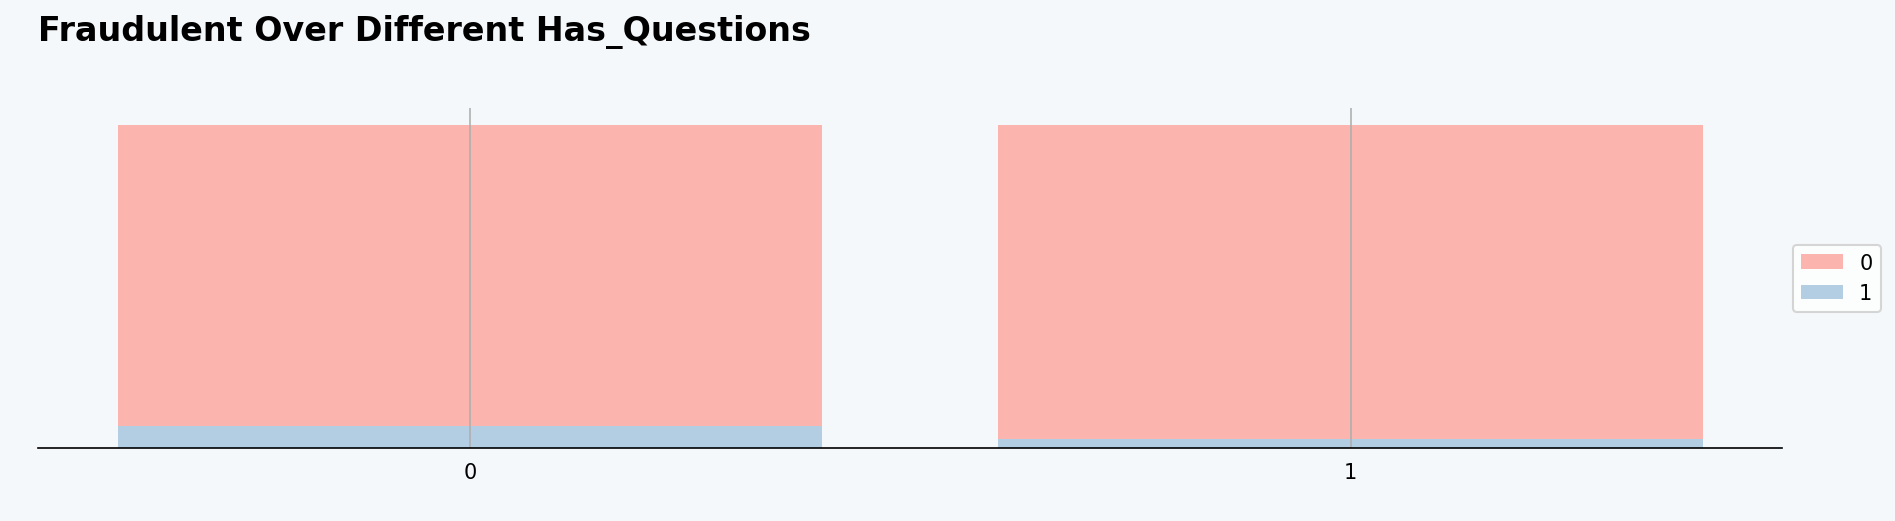

In [69]:
generate_bar_proportion(raw_data, 'fraudulent', 'has_questions', color = 0, order = True, topn = 12)

## Text Exploration and Visualization

In [136]:
def print_job(data, jobid):
    printdata = data[data.job_id==jobid]
    print('Title:',printdata.title.item(), '/ Location:', printdata.location.item())
    print('Department:',printdata.department.item(), '/ Salary:', printdata.salary_range.item(), '/ Employment type:', printdata.employment_type.item())
    print('Function:',printdata.function.item(), '/ Required Experience:', printdata.required_experience.item(), '/ Required Education:', printdata.required_education.item())
    print('Fraudulent:', printdata.fraudulent.item())
    print('-------------------- Company --------------------')
    print(printdata.company_profile.item())
    print('-------------------- Job Description --------------------')
    print(printdata.description.item())
    print('-------------------- Requirements --------------------')
    print(printdata.requirements.item())
    print('-------------------- Benifits --------------------')
    print(printdata.benefits.item())
print_job(raw_data,50)

Title: Customer Service Team Lead / Location: US, NH, Dover
Department: nan / Salary: nan / Employment type: Full-time
Function: Customer Service / Required Experience: Entry level / Required Education: High School or equivalent
Fraudulent: 0
-------------------- Company --------------------
Novitex Enterprise Solutions, formerly Pitney Bowes Management Services, delivers innovative document and communications management solutions that help companies around the world drive business process efficiencies, increase productivity, reduce costs and improve customer satisfaction. For almost 30 years, clients have turned to us to integrate and optimize their enterprise-wide business processes to empower employees, increase productivity and maximize results. As a trusted partner, we continually focus on delivering secure, technology-enabled document and communications solutions that improve our clients' work processes, enhance their customer interactions and drive growth.
-------------------- J

['nbsp', 'ux', 'joomla', 'di', 'biztalk', 'bull', 'magento', 'gt', 'sa', 'und', 'tattoo', 'peoplesoft', 'plm', 'spartan', 'affiliate', 'wannayum', 'cove', 'hair', 'cashier', 'os', 'de', 'church', 'csr', 'sitecore', 'academy', 'hospital', 'migration', 'yeast', 'microstrategy', 'graphite']


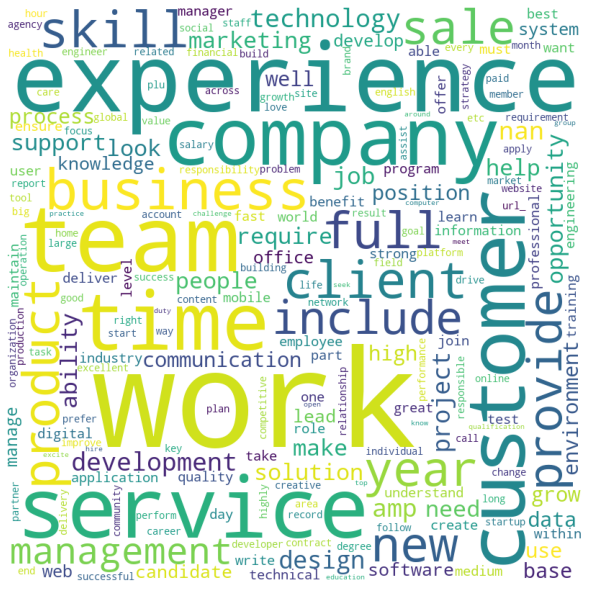

,Topics,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10
0,1,technology,data,software,development,product,use,application,system,web,test
1,2,project,client,design,development,get,amp,product,job,opportunity,new
2,3,marketing,new,grow,product,look,opportunity,customer,business,people,medium
3,4,de,και,people,shall,web,user,english,international,new,digital
4,5,business,customer,sale,client,marketing,management,product,new,medium,solution
5,6,customer,home,position,must,hour,benefit,day,closing,require,professional
6,7,customer,management,business,client,require,process,amp,system,communication,solution
7,8,design,development,web,product,project,mobile,application,new,technology,software
8,9,sale,amp,business,job,ensure,customer,role,training,career,candidate
9,10,sale,job,customer,business,product,website,technical,marketing,apply,quality


In [145]:
# raw_data['jd_tokens'] = textClean.pipeline(raw_data['jd'].to_list(), multi_gram = [1], lower_case=True, 
#                                            deacc=False, encoding='utf8', errors='strict', stem_lemma = 'lemma', 
#                                            tag_drop = [], nltk_stop=True, 
#                                            stop_word_list=[], 
#                                            check_numbers=False, word_length=2, remove_consecutives=True)
fraud_tokens = list(raw_data[raw_data.fraudulent==1]['jd_tokens'])
print(tfidf.get_top_n_tfidf_bow(fraud_tokens, top_n_tokens = 30))
DataExploration.generate_word_cloud(fraud_tokens)
no_topics = 10
lda_allbow, bow_corpus, dictionary = lda.fit_lda(fraud_tokens, num_topics = 10)
lda.lda_topics(lda_allbow)

['online use', 'administrative full', 'project nan', 'nan work', 'service nan', 'sit amet', 'well test', 'th grade', 'marketing full', 'rho epsilon', 'project control', 'nan need', 'credit union', 'crew leader', 'backend system', 'office manager', 'time amp', 'rich medium', 'loan originator', 'internal audit', 'massage therapist', 'fully qualify', 'são paulo', 'office nan', 'primary care', 'information security', 'young people', 'student part', 'echo green', 'include ongoing']


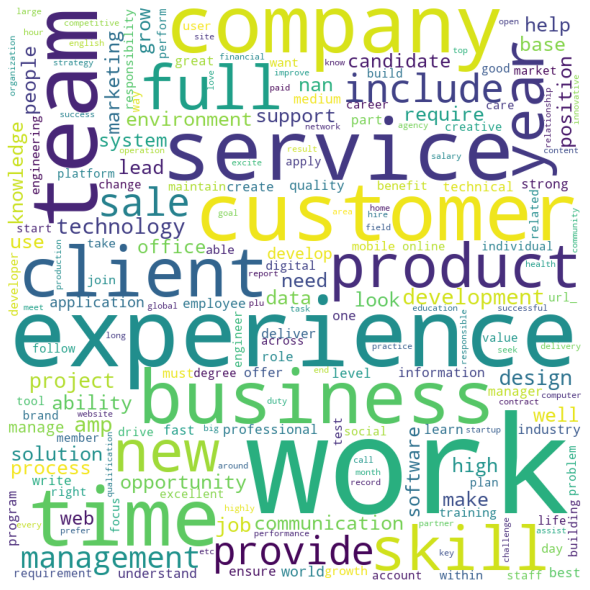

,Topics,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10
0,1,customer service,business process,document communication,increase productivity,service associate,communication skill,high level,around world,customer satisfaction,client work
1,2,customer service,communication skill,year experience,time nan,financial service,team member,part time,social medium,fast pace,nan full
2,3,year experience,information technology,communication skill,business intelligence,engineering full,team member,fast grow,customer service,software development,technology full
3,4,year old,job description,university degree,experience prefer,amp secure,help teacher,degree require,cost living,see job,teach experience
4,5,customer service,communication skill,new zealand,work environment,mso style,cerebral palsy,developmental disability,fast pace,join team,must able
5,6,valor service,social medium,ideal candidate,business development,year experience,real estate,communication skill,fast pace,private sector,fast grow
6,7,customer service,best practice,fast grow,per week,year experience,social medium,international broadcaster,long term,communication skill,echo green
7,8,social medium,customer service,work environment,part time,fast pace,communication skill,year experience,policy procedure,skill ability,time nan
8,9,customer service,nan full,provide full,medium large,time permanent,large company,many medium,permanent position,position many,high quality
9,10,customer service,year experience,information technology,hard work,communication skill,fast pace,offer competitive,new york,benefit package,minimum year


In [146]:
raw_data['jd_tokens2'] = textClean.pipeline(raw_data['jd'].to_list(), multi_gram = [2], lower_case=True, 
                                           deacc=False, encoding='utf8', errors='strict', stem_lemma = 'lemma', 
                                           tag_drop = [], nltk_stop=True, 
                                           stop_word_list=[], 
                                           check_numbers=False, word_length=2, remove_consecutives=True)
print(tfidf.get_top_n_tfidf_bow(list(raw_data['jd_tokens2']), top_n_tokens = 30))
DataExploration.generate_word_cloud(list(raw_data['jd_tokens2']))
no_topics = 10
lda_allbow, bow_corpus, dictionary = lda.fit_lda(list(raw_data['jd_tokens2']), num_topics = 10)
lda.lda_topics(lda_allbow)